# Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Binarizer
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import re

Цель работы:
- предсказать поступит ли персонаж на супергеройский факультет Гарвардского университета
- протестировать полученную модель на другом вымышленном персонаже
- Выявить точность предсказания с текстовым описанием и без него

Дополнительные цели:
- Определять хотя бы некоторые характеристики героя только по его описанию
- Генерирование текста для героя с заданными параметрами

# Без текстового описания

# Загружаем данные

In [ ]:
df = pd.read_csv('/Users/magatigr/Downloads/abiturient.csv')
df.head()

,name,real_name,powers_text,intelligence_score,gender,height,weight,eye_color,hair_color,has_electrokinesis,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.",NaN,85,Male,-,-,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,100,NaN,-,-,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,"On rare occasions, and through unusual circu...",80,Male,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,80,Male,-,-,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,NaN,80,Male,-,-,NaN,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Предварительно удалим ненужные признаки:

In [ ]:
df.drop(['name', 'powers_text' ], axis = 1, inplace = True )

In [ ]:
df.shape

(1450, 57)

**Real_name оставим, чтобы потом заполнить пропуски в Gender*

Обозначим таргет:

In [ ]:
df.dropna(subset = ['intelligence_score'], axis = 0, inplace = True)

In [ ]:
intelligence_score = df['intelligence_score'].to_numpy().reshape(-1,1)
binarizer = Binarizer(0.8*df['intelligence_score'].mean())
new_values = binarizer.fit_transform(intelligence_score)
df['intelligence_score'] = new_values
df['intelligence_score']

0       1
1       1
2       1
3       1
4       1
       ..
1445    1
1446    1
1447    1
1448    1
1449    0
Name: intelligence_score, Length: 1450, dtype: int64

# Предварительно оценим данные

In [ ]:
print('Размерность данных – {} столбцов и {} строк'.format(df.shape[1], df.shape[0]))

Размерность данных – 57 столбцов и 1450 строк


In [ ]:
df.nunique()

real_name                           1068
intelligence_score                     2
gender                                 2
height                               120
weight                               246
eye_color                             25
hair_color                            31
has_electrokinesis                     2
has_energy_constructs                  2
has_mind_control_resistance            2
has_matter_manipulation                2
has_telepathy_resistance               2
has_mind_control                       2
has_enhanced_hearing                   2
has_dimensional_travel                 2
has_element_control                    2
has_size_changing                      2
has_fire_resistance                    2
has_fire_control                       2
has_dexterity                          2
has_reality_warping                    2
has_illusions                          2
has_energy_beams                       2
has_peak_human_condition               2
has_shapeshiftin

Видим, что много категориальных признаков.

In [ ]:
df.isnull().sum()

real_name                           149
intelligence_score                    0
gender                              145
height                                2
weight                                2
eye_color                           264
hair_color                          248
has_electrokinesis                   67
has_energy_constructs                67
has_mind_control_resistance          67
has_matter_manipulation              67
has_telepathy_resistance             67
has_mind_control                     67
has_enhanced_hearing                 67
has_dimensional_travel               67
has_element_control                  67
has_size_changing                    67
has_fire_resistance                  67
has_fire_control                     67
has_dexterity                        67
has_reality_warping                  67
has_illusions                        67
has_energy_beams                     67
has_peak_human_condition             67
has_shapeshifting                    67


Вглянем на наличие зависимотей от тагрета для некоторых признаков:

In [ ]:
df.groupby('gender')['intelligence_score'].value_counts()

gender  intelligence_score
Female  1                     315
        0                      20
Male    1                     879
        0                      91
Name: intelligence_score, dtype: int64

In [ ]:
superpowers_cols = df.columns[df.columns.str.startswith("has_")]
superpowers_cols[:10]

Index(['has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing'],
      dtype='object')

array([[<AxesSubplot:title={'center':'has_accelerated_healing'}>,
        <AxesSubplot:title={'center':'has_agility'}>,
        <AxesSubplot:title={'center':'has_cold_resistance'}>,
        <AxesSubplot:title={'center':'has_dexterity'}>,
        <AxesSubplot:title={'center':'has_dimensional_travel'}>,
        <AxesSubplot:title={'center':'has_durability'}>,
        <AxesSubplot:title={'center':'has_electrokinesis'}>],
       [<AxesSubplot:title={'center':'has_element_control'}>,
        <AxesSubplot:title={'center':'has_endurance'}>,
        <AxesSubplot:title={'center':'has_energy_absorption'}>,
        <AxesSubplot:title={'center':'has_energy_beams'}>,
        <AxesSubplot:title={'center':'has_energy_blasts'}>,
        <AxesSubplot:title={'center':'has_energy_constructs'}>,
        <AxesSubplot:title={'center':'has_energy_manipulation'}>],
       [<AxesSubplot:title={'center':'has_enhanced_hearing'}>,
        <AxesSubplot:title={'center':'has_enhanced_senses'}>,
        <AxesSubplot:

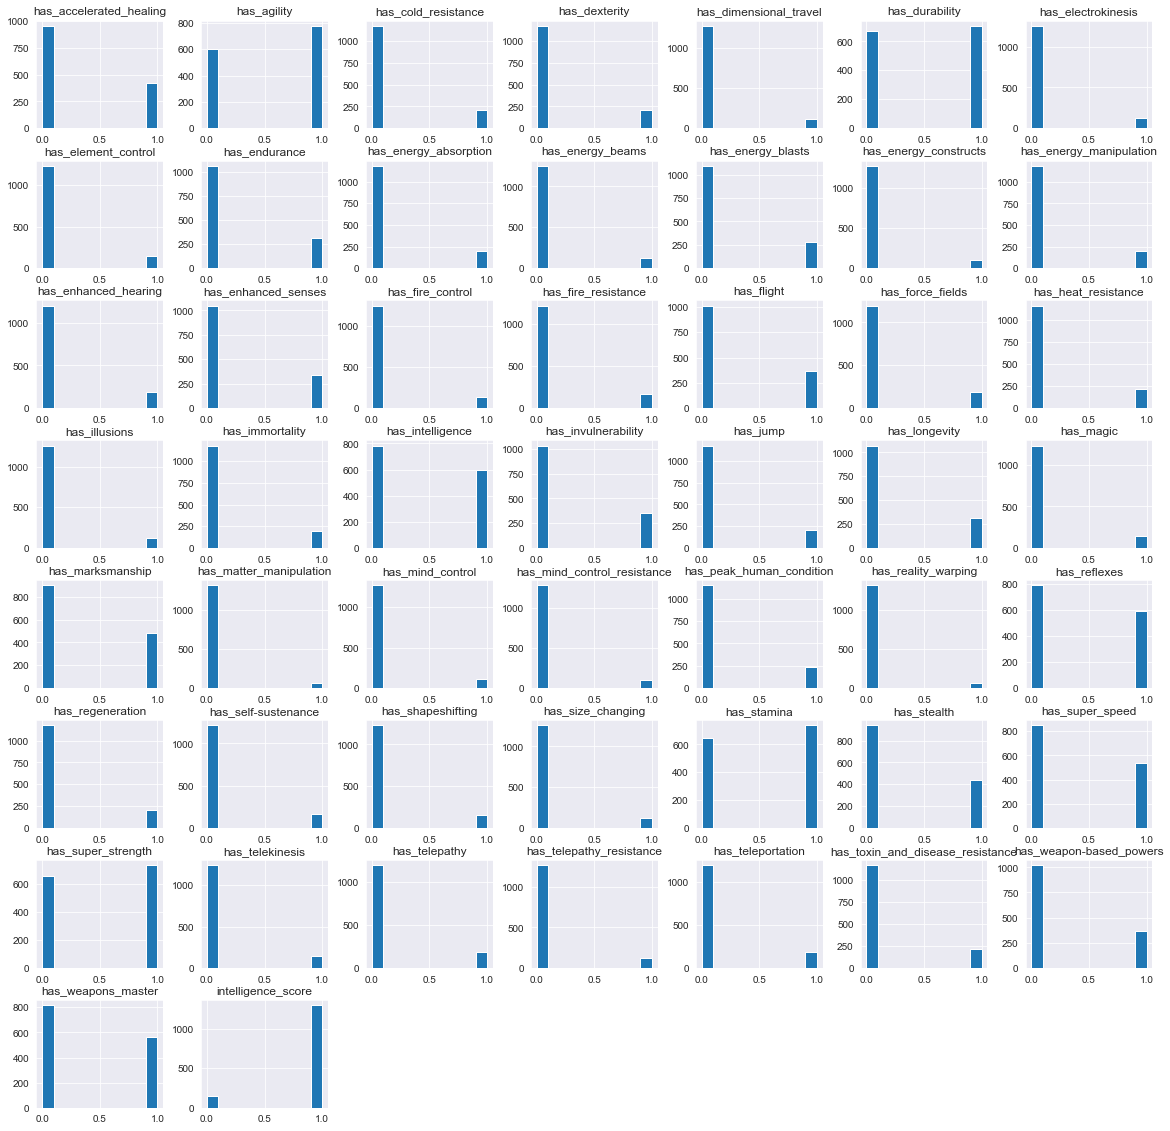

In [ ]:
df.hist(figsize=(20,20))

# Предобработка

## Пропуски

In [ ]:
df.isnull().sum()

real_name                           149
intelligence_score                    0
gender                              145
height                                2
weight                                2
eye_color                           264
hair_color                          248
has_electrokinesis                   67
has_energy_constructs                67
has_mind_control_resistance          67
has_matter_manipulation              67
has_telepathy_resistance             67
has_mind_control                     67
has_enhanced_hearing                 67
has_dimensional_travel               67
has_element_control                  67
has_size_changing                    67
has_fire_resistance                  67
has_fire_control                     67
has_dexterity                        67
has_reality_warping                  67
has_illusions                        67
has_energy_beams                     67
has_peak_human_condition             67
has_shapeshifting                    67


#### 1) В колонках со способностями

Пропуски в колонках способностей находятся везде на том же месте, поэтому их можно попросту удалить:

In [ ]:
df.dropna(axis = 0, subset=superpowers_cols, inplace = True)

#### 2) Цвет глаз и волос

Пропуски в eye_color и hair_color заполним наиболее частыми значениями:

In [ ]:
df.hair_color.value_counts()

Black               328
Brown               202
No Hair             178
Blond               166
Red                  74
White                60
Grey                 33
Green                19
Auburn               13
Strawberry Blond     12
Blue                 11
Brown / White        10
Brown / Black         9
Purple                6
Yellow                6
Black / Blue          4
black                 3
Gold                  3
Orange                3
None                  3
Pink                  3
Red / Orange          2
Silver                2
blond                 2
Indigo                1
Red / White           1
Orange / White        1
Red / Grey            1
Magenta               1
Brownn                1
Name: hair_color, dtype: int64

In [ ]:
df.eye_color.value_counts()

Blue                       353
Brown                      260
Black                      146
Green                      118
Red                         99
White                       36
Yellow                      30
Grey                        16
Hazel                       14
Purple                      12
Blue / White                 9
No eyes                      7
Green / Blue                 7
Gold                         6
Orange                       6
Amber                        5
Violet                       4
Pink                         3
Silver                       3
blue                         3
Yellow / Green               2
Yellow (without irises)      2
brown                        2
Yellow / Blue                1
White / Red                  1
Name: eye_color, dtype: int64

In [ ]:
df.hair_color.fillna('Black', inplace = True)
df.eye_color.fillna('Blue', inplace = True)

#### 3) Пол

Следующий этап – предсказать пол. Сделать это получится по имени, если же нет ни имени, ни пола, то эту строку попросту убираем:

In [ ]:
df.fillna('nan', inplace = True)

Удалим строки без имени и пола:

In [ ]:
df.drop(df.loc[(df.gender == 'nan') & (df.real_name == 'nan')].index, inplace = True)

Предскажем пол только по имени, но для начала надо вычленить имя:

In [ ]:
df.loc[df.gender == 'nan']

,real_name,intelligence_score,gender,height,weight,eye_color,hair_color,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
1,Bruce Wayne,1,nan,-,-,Blue,Black,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
14,Kyle Morgan,1,nan,-,-,Blue,Black,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
27,David North,1,nan,-,-,Blue,Black,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
40,Hercules,1,nan,-,-,Blue,Black,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
45,Amanda Waller,1,nan,5'1 • 155 cm,200 lb • 90 kg,Brown,Brown,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,Oblivion,1,nan,-,-,Black,No Hair,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1349,Lord James Montgomery Falsworth,1,nan,-,-,Blue,Black,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1350,Mikhail Ursus,1,nan,7'5 • 226 cm,955 lb • 430 kg,Brown,Brown,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1396,Wendigo,1,nan,-,-,Green,White,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Прежде всего, надо вычленить имя. Для этого мы будем использовать библиотеку nameparser:

In [ ]:
df_g_pred = df.loc[df.gender == 'nan']
df_g_pred = df_g_pred[['real_name', 'gender' ]]

df_g_true = df.loc[df.gender != 'nan']
df_g_true = df_g_true[['real_name', 'gender' ]]

In [ ]:
from nameparser import HumanName

names = []
for value in df_g_pred['real_name']:
    name = HumanName(value)
    names.append(name.first)
    
df_g_pred['Name'] = names

Для предсказания пола будет использовать другую библиотеку gender-guesser:

In [ ]:
import gender_guesser.detector as gender

gd = gender.Detector()
gender = []
for value in df_g_pred['Name']:
    g = gd.get_gender(value)
    gender.append(g)
    
df_g_pred['gender'] = gender

In [ ]:
df_g_pred.gender.value_counts()

male             33
unknown          32
female            8
mostly_female     4
andy              1
Name: gender, dtype: int64

unknown сделаем male, mostly_female и andy в female:

In [ ]:
df_g_pred.loc[df_g_pred.gender == 'male', 'gender'] = 'Male'
df_g_pred.loc[df_g_pred.gender == 'female', 'gender'] = 'Female'
df_g_pred.loc[df_g_pred.gender == 'unknown', 'gender'] = 'Male'
df_g_pred.loc[df_g_pred.gender == 'mostly_female', 'gender'] = 'Female'
df_g_pred.loc[df_g_pred.gender == 'andy', 'gender'] = 'Female'

In [ ]:
df_gender = pd.concat([df_g_pred, df_g_true], axis = 0,  join = 'inner', ignore_index = False)
df_gender.sort_index(ascending=True, inplace = True)

In [ ]:
df_gender

,real_name,gender
0,"Delroy Garrett, Jr.",Male
1,Bruce Wayne,Male
2,Richard Milhouse Jones,Male
3,Aa,Male
4,Aaron Cash,Male
...,...,...
1444,Zane,Male
1445,Zatanna Zatara,Female
1446,DWN-∞: Zero,Male
1447,Hunter Zolomon,Male


Заменим это значение для основного датасета:

In [ ]:
df.gender = df_gender.gender.copy()

In [ ]:
df.gender.value_counts()

Male      1012
Female     343
Name: gender, dtype: int64

#### 4) Вес и рост

Пропуски обозначены чертами, эти значения можно заменить медианным значением. Но сначала нужно вычленить цифру роста и веса:

In [ ]:
df.head()

,real_name,intelligence_score,gender,height,weight,eye_color,hair_color,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,"Delroy Garrett, Jr.",1,Male,-,-,Blue,Black,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Bruce Wayne,1,Male,-,-,Blue,Black,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,Richard Milhouse Jones,1,Male,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,1,Male,-,-,Blue,Black,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,1,Male,-,-,Blue,Black,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
weights = []
for value in df.weight:
    if len(value.split())>2:
        elements = value.split()
        weights.append(elements[3])
        
#исправим пару значение
weights[784] = 271.4
weights[878] = 208

In [ ]:
heights = []
for value in df.height:
    if len(value.split())>2:
        elements = value.split()
        heights.append(elements[2])

In [ ]:
weights = list(map(float, weights))
heights = list(map(float, heights))

Рассчитаем среднее и заменим пропуски:

In [ ]:
int(statistics.median(heights))

178

In [ ]:
int(statistics.median(weights))

79

Сделаем теперь список всех значений из признаков по отдельности:

In [ ]:
all_weights = []
for value in df.weight:
    if len(value.split())>2:
        elements = value.split()
        all_weights.append(elements[3])
    else:
        all_weights.append(int(statistics.median(weights)))
        
all_weights[1093] = 271.4
all_weights[1215] = 208.0
        
all_heights = []
for value in df.height:
    if len(value.split())>2:
        elements = value.split()
        all_heights.append(elements[2])
    else:
        all_heights.append(int(statistics.median(heights)))
        
all_weights = list(map(float, all_weights))
all_heights = list(map(float, all_heights))

Вставим новые значения в таблицу:

In [ ]:
df.weight = all_weights
df.height = all_heights

Все пропуски обработаны.

## Выбросы

У нас появились признаки веса и роста, которые являются типичным примером для обнаружения выбросов:

<AxesSubplot:xlabel='height', ylabel='Density'>

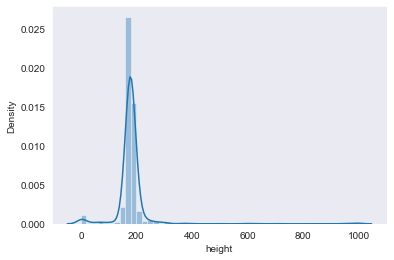

In [ ]:
sns.distplot(df.height)

<AxesSubplot:xlabel='weight', ylabel='Density'>

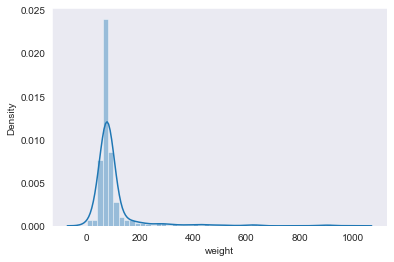

In [ ]:
sns.distplot(df.weight)

In [ ]:
a = df.copy()

Есть смысл выделить выбросы, а потом прошкалировать:

In [ ]:
Q1_w = df.weight.quantile(0.1)
Q3_w = df.weight.quantile(0.9)
print(Q1_w, Q3_w)

53.0 138.00000000000068


In [ ]:
Q1_h = df.height.quantile(0.1)
Q3_h = df.height.quantile(0.9)
print(Q1_h, Q3_h)

163.0 196.0


In [ ]:
df = df.loc[(df.weight>Q1_w) & (df.weight<Q3_w)]
df = df.loc[(df.height>Q1_h) & (df.height<Q3_h)]

In [ ]:
df.shape

(951, 57)

## Категориальные признаки

In [ ]:
df.nunique()

real_name                           748
intelligence_score                    2
gender                                2
height                               12
weight                               63
eye_color                            22
hair_color                           28
has_electrokinesis                    2
has_energy_constructs                 2
has_mind_control_resistance           2
has_matter_manipulation               2
has_telepathy_resistance              2
has_mind_control                      2
has_enhanced_hearing                  2
has_dimensional_travel                2
has_element_control                   2
has_size_changing                     2
has_fire_resistance                   2
has_fire_control                      2
has_dexterity                         2
has_reality_warping                   2
has_illusions                         2
has_energy_beams                      2
has_peak_human_condition              2
has_shapeshifting                     2


real_name удаляем:

In [ ]:
df.drop('real_name', axis = 1, inplace = True)

eye_color и hair_color можно перевести к категориальным признакам, сделав категорию "редкий цвет":

In [ ]:
df.eye_color.value_counts()

Blue                       468
Brown                      189
Black                       81
Green                       69
Red                         40
White                       17
Yellow                      16
Grey                        15
Hazel                       13
Purple                       9
Green / Blue                 7
Blue / White                 5
Gold                         4
Amber                        3
blue                         3
No eyes                      3
Orange                       3
Violet                       2
Yellow (without irises)      1
Pink                         1
White / Red                  1
brown                        1
Name: eye_color, dtype: int64

In [ ]:
df.hair_color.value_counts()

Black               405
Brown               146
Blond               124
No Hair              95
Red                  49
White                36
Grey                 20
Brown / White        10
Auburn                9
Strawberry Blond      8
Brown / Black         8
Green                 7
Purple                6
Blue                  4
Yellow                4
Silver                2
blond                 2
black                 2
Black / Blue          2
Gold                  2
None                  2
Pink                  2
Indigo                1
Red / Grey            1
Red / Orange          1
Magenta               1
Red / White           1
Orange                1
Name: hair_color, dtype: int64

Все, что меньше 100 будет редким.

In [ ]:
b = df.copy()

In [ ]:
df.loc[(df.eye_color == 'Blue')|(df.eye_color == 'Brown'), 'eye_color'] = 'not rare'
df.loc[(df.eye_color != 'Blue')&(df.eye_color != 'Brown')&(df.eye_color != 'not rare'), 'eye_color'] = 'rare'

df.loc[(df.hair_color == 'Black')|(df.hair_color == 'Brown'), 'hair_color'] = 'not rare'
df.loc[(df.hair_color != 'Black')&(df.hair_color != 'Brown')&(df.hair_color != 'not rare'), 'hair_color'] = 'rare'

In [ ]:
df.eye_color.value_counts()

not rare    657
rare        294
Name: eye_color, dtype: int64

In [ ]:
df.hair_color.value_counts()

not rare    551
rare        400
Name: hair_color, dtype: int64

Трансформируем данные:

In [ ]:
df.shape

(951, 56)

In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
df.shape

(951, 56)

## Дисбаланс классов

In [ ]:
df.intelligence_score.value_counts()

1    892
0     59
Name: intelligence_score, dtype: int64

В данных наблюдается сильный дисбаланс. Выход – **насэмплировать**. Для этого применим метод сэмплирования ADASYN:

In [ ]:
from imblearn.over_sampling import ADASYN

sm = ADASYN(random_state = 42)
X = df.drop('intelligence_score', axis = 1)
y = df['intelligence_score']
X_new, y_new = sm.fit_sample(X, y)

df = pd.concat([X_new, y_new], axis = 1)

In [ ]:
df.intelligence_score.value_counts()

0    895
1    892
Name: intelligence_score, dtype: int64

С дисбалансом разобрались

## Построение модели

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('intelligence_score', axis = 1)
y = df.intelligence_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Прошкалируем вес и рост

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['weight', 'height']])
X_test_scaled = scaler.transform(X_test[['weight', 'height']])

In [ ]:
X_train[['weight', 'height']] = X_train_scaled
X_test[['weight', 'height']] = X_test_scaled

#### Отбор признаков

Модель RFECV сама выберет оптимальное число признаков:

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Оптимальное число фичей :', rfecv.n_features_)
print('Лучшие фичи :', X_train.columns[rfecv.support_])

Оптимальное число фичей : 48
Лучшие фичи : Index(['height', 'weight', 'has_electrokinesis', 'has_mind_control_resistance',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_element_control', 'has_size_changing', 'has_fire_resistance',
       'has_fire_control', 'has_dexterity', 'has_illusions',
       'has_energy_beams', 'has_peak_human_condition', 'has_shapeshifting',
       'has_heat_resistance', 'has_jump', 'has_energy_absorption', 'has_magic',
       'has_telekinesis', 'has_telepathy', 'has_regeneration',
       'has_immortality', 'has_teleportation', 'has_force_fields',
       'has_energy_manipulation', 'has_endurance', 'has_longevity',
       'has_weapon-based_powers', 'has_energy_blasts', 'has_enhanced_senses',
       'has_invulnerability', 'has_stealth', 'has_marksmanship', 'has_flight',
       'has_accelerated_healing', 'has_weapons_master', 'has_intelligence',
       'has_reflexes', 'has_super_speed', 'has_durability', 'has_stamina',
 

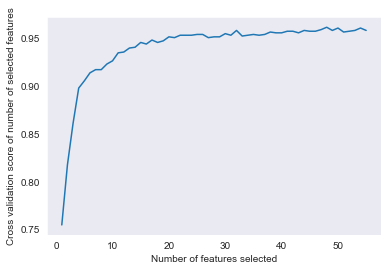

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
best_features = X_train.columns[rfecv.support_]

In [ ]:
X_train = X_train[best_features]
X_test = X_test[best_features]

In [ ]:
# логистическая регрессия
model1 = LogisticRegression()

# градиентный бустинг
model2 = LGBMClassifier(max_depth=4, n_estimators=300, learning_rate=0.005, random_state=1, num_leaves = 20)
model3 = LGBMClassifier(max_depth=6, n_estimators=300, learning_rate=0.005, random_state=1, num_leaves = 20)

# случайный лес
model4 = RandomForestClassifier(n_estimators=10, random_state=1)
model5 = RandomForestClassifier(n_estimators=15, random_state=1)

# обычный бэггинг логистических регрессий
model6 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=1)
model7 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=15, random_state=1)

# обычный бэггинг деревьев
model8 = BaggingClassifier(n_estimators=10, random_state=1)
model9 = BaggingClassifier(n_estimators=15, random_state=1)

models = [model1, model2, model3, model4, model5,
         model6, model7, model8, model9]

table_models = pd.DataFrame(columns = ["mean_absolute_error"], index = ["model "+str(i) for i in range(1,10)])

#Обучаем
for num, mod in enumerate(models):
    mod.fit(X_train, y_train)
    mae_valid = mean_absolute_error(y_test, mod.predict(X_test))
    table_models.loc["model "+str(num+1), "mean_absolute_error"] = mae_valid

#Проверяем результат
table_models.sort_values(by="mean_absolute_error")

,mean_absolute_error
model 5,0.0491525
model 8,0.0508475
model 4,0.0525424
model 9,0.0576271
model 3,0.0847458
model 2,0.1
model 1,0.10678
model 7,0.110169
model 6,0.115254


#### Нейронная сеть

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=10, epochs=100, verbose = 1)

mean_absolute_error(y_test, model.predict(X_test))

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 0.6288 - accuracy: 0.6257
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8221
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8747
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.9064
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2137 - accuracy: 0.9215
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1865 - accuracy: 0.9440
Epoch 7/100
120/120 [==============================] - 0s 980us/step - loss: 0.1649 - accuracy: 0.9499
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9582
Epoch 9/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.9607
Epoch 10/100
120/120 [==============================] - 0s 960us/step - loss: 0.1156 - ac

0.06100342368217078

Нейронная сеть дышит в спину моделям машинного обучения, показывая так же хороший скор. Давайте проверим вес признаков через реализацию RandomForestClassifier:

In [ ]:
importances = list(zip(model5.feature_importances_, X_train.columns))
importances.sort(reverse=True)

In [ ]:
importances

[(0.13591484676310872, 'has_durability'),
 (0.09557338126595484, 'has_agility'),
 (0.07862438566020528, 'has_intelligence'),
 (0.07387960471521934, 'has_weapons_master'),
 (0.04523518406647189, 'weight'),
 (0.03938380965913536, 'has_accelerated_healing'),
 (0.03847139633811351, 'height'),
 (0.033863838354758403, 'hair_color_rare'),
 (0.03182041187316709, 'has_reflexes'),
 (0.027416040594523232, 'has_super_speed'),
 (0.02670315370006796, 'has_stamina'),
 (0.023281605737160982, 'has_energy_blasts'),
 (0.01849598515453273, 'has_teleportation'),
 (0.018372647975734343, 'has_flight'),
 (0.017640571703682918, 'has_weapon-based_powers'),
 (0.01756952386925243, 'has_invulnerability'),
 (0.016983914107553788, 'has_super_strength'),
 (0.016079379857753838, 'has_longevity'),
 (0.01580733725734907, 'has_peak_human_condition'),
 (0.014596679310403633, 'has_enhanced_senses'),
 (0.01436014711181299, 'eye_color_rare'),
 (0.013509144800706186, 'has_stealth'),
 (0.013323196434139768, 'has_marksmanship')

Как мы видим, вклад признаков на хвосте мал, поэтому около 10-ти признаков отсеклись, хотя можно попробовать отсечь побольше.

### 30 фичей

In [ ]:
#возвращаем исходные данные
X = df.drop('intelligence_score', axis = 1)
y = df.intelligence_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#шкалируем
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['weight', 'height']])
X_test_scaled = scaler.transform(X_test[['weight', 'height']])
X_train[['weight', 'height']] = X_train_scaled
X_test[['weight', 'height']] = X_test_scaled

#отбираем 30 лучших признаков
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf, n_features_to_select=30, step=1)
rfe = rfe.fit(X_train, y_train)
best_features = list(X_train.columns[rfe.support_])

#применяем новые данные
X_train = X_train[best_features]
X_test = X_test[best_features]

# логистическая регрессия
model1 = LogisticRegression()

# градиентный бустинг
model2 = LGBMClassifier(max_depth=4, n_estimators=300, learning_rate=0.005, random_state=1, num_leaves = 20)
model3 = LGBMClassifier(max_depth=6, n_estimators=300, learning_rate=0.005, random_state=1, num_leaves = 20)

# случайный лес
model4 = RandomForestClassifier(n_estimators=10, random_state=1)
model5 = RandomForestClassifier(n_estimators=15, random_state=1)

# обычный бэггинг логистических регрессий
model6 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=1)
model7 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=15, random_state=1)

# обычный бэггинг деревьев
model8 = BaggingClassifier(n_estimators=10, random_state=1)
model9 = BaggingClassifier(n_estimators=15, random_state=1)

models = [model1, model2, model3, model4, model5,
         model6, model7, model8, model9]

table_models = pd.DataFrame(columns = ["mean_absolute_error"], index = ["model "+str(i) for i in range(1,10)])

#Обучаем
for num, mod in enumerate(models):
    mod.fit(X_train, y_train)
    mae_valid = mean_absolute_error(y_test, mod.predict(X_test))
    table_models.loc["model "+str(num+1), "mean_absolute_error"] = mae_valid

#Проверяем результат
table_models.sort_values(by="mean_absolute_error")


,mean_absolute_error
model 5,0.0457627
model 4,0.0491525
model 8,0.0694915
model 9,0.0694915
model 3,0.0898305
model 2,0.1
model 6,0.130508
model 7,0.132203
model 1,0.133898


Точность стала лучше на несколько тысячных.

#### Нейронная сеть

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=10, epochs=100, verbose = 1)

mean_absolute_error(y_test, model.predict(X_test))

Epoch 1/100
120/120 [==============================] - 0s 895us/step - loss: 0.6080 - accuracy: 0.6416
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7886
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8396
Epoch 4/100
120/120 [==============================] - 0s 966us/step - loss: 0.3168 - accuracy: 0.8713
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.8906
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2515 - accuracy: 0.9064
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9190
Epoch 8/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2029 - accuracy: 0.9348
Epoch 9/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1828 - accuracy: 0.9432
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1646 - ac

0.048776748439729185

Нейронная сеть показала себя лушче на две сотые. Значит все-таки, можно усечь еще признаков.

# С текстовым описанием (работа с текстом и таргетом отдельно)

In [ ]:
df = pd.read_csv('/Users/magatigr/Downloads/abiturient.csv')
df.head()

,name,real_name,powers_text,intelligence_score,gender,height,weight,eye_color,hair_color,has_electrokinesis,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.",NaN,85,Male,-,-,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,100,NaN,-,-,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,"On rare occasions, and through unusual circu...",80,Male,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,80,Male,-,-,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,NaN,80,Male,-,-,NaN,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Создадим таргет:

In [ ]:
intelligence_score = df['intelligence_score'].to_numpy().reshape(-1,1)
binarizer = Binarizer(0.8*df['intelligence_score'].mean())
new_values = binarizer.fit_transform(intelligence_score)
df['intelligence_score'] = new_values

In [ ]:
df.isnull().sum()

name                                  2
real_name                           149
powers_text                         364
intelligence_score                    0
gender                              145
height                                2
weight                                2
eye_color                           264
hair_color                          248
has_electrokinesis                   67
has_energy_constructs                67
has_mind_control_resistance          67
has_matter_manipulation              67
has_telepathy_resistance             67
has_mind_control                     67
has_enhanced_hearing                 67
has_dimensional_travel               67
has_element_control                  67
has_size_changing                    67
has_fire_resistance                  67
has_fire_control                     67
has_dexterity                        67
has_reality_warping                  67
has_illusions                        67
has_energy_beams                     67


Четверть текстовых данных отсутствует. То есть кроме обычного сокращения данных, мы скинем еще 400 строк, что плохо отразится на качестве моделей. Важные фактом для тагрета могло бы быть **наличие текстового описания**. Оценим это в конце данной работы.

In [ ]:
df = df[['powers_text', 'intelligence_score' ]]
df.head()

,powers_text,intelligence_score
0,NaN,1
1,NaN,1
2,"On rare occasions, and through unusual circu...",1
3,NaN,1
4,NaN,1


## Предобработка

### Пропуски удалим:

In [ ]:
df.dropna(axis = 0, inplace = True)

### Проверим баланс классов

<AxesSubplot:xlabel='intelligence_score', ylabel='count'>

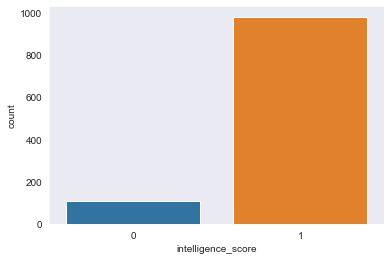

In [ ]:
sns.set_style("dark")
sns.countplot(df.intelligence_score)

Наблюдается явный дисбаланс. Насэмплировать текст не самая легкая задача. Пока что оставим это **без внимания**.

### Очистим текст от шумов

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import string

Зададим стоп-слова и пунктуацию:

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

Теперь уберем их из текста:

In [ ]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['powers_text']=df['powers_text'].apply(remove_stopwords)

### Визуализируем наши данные

**Wordcloud** – это техника визуализации данных, где на первый план выносятся самые часто упоминаемые слова:

#### Wordcloud для intelligence_score = 1:

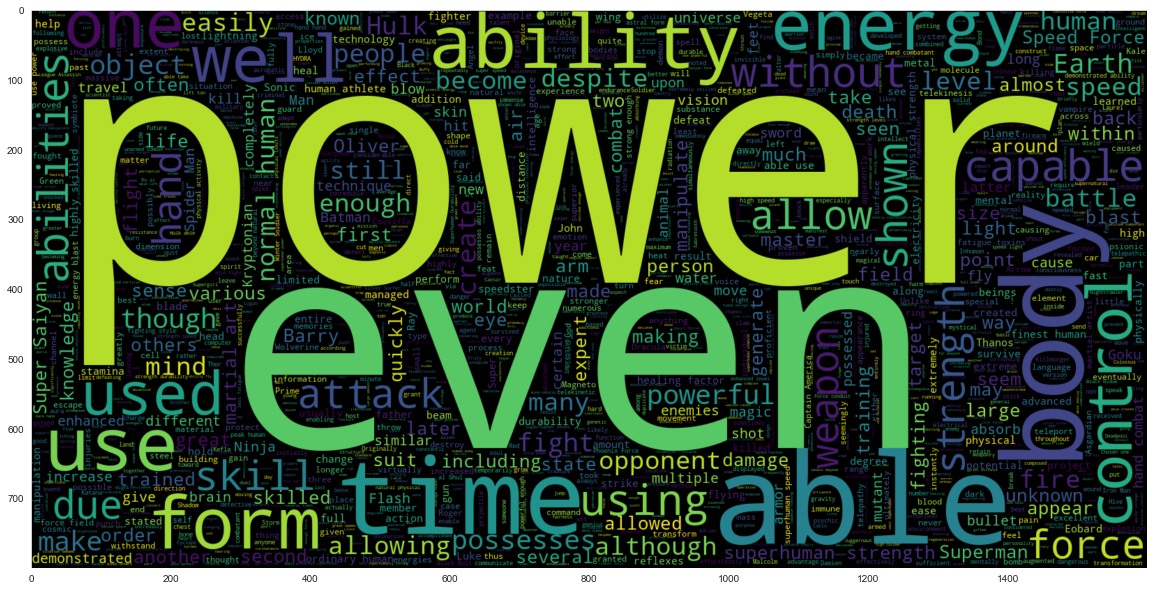

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.intelligence_score == 1].powers_text))
plt.imshow(wc , interpolation = 'bilinear')

#### Wordcloud для intelligence_score = 0:

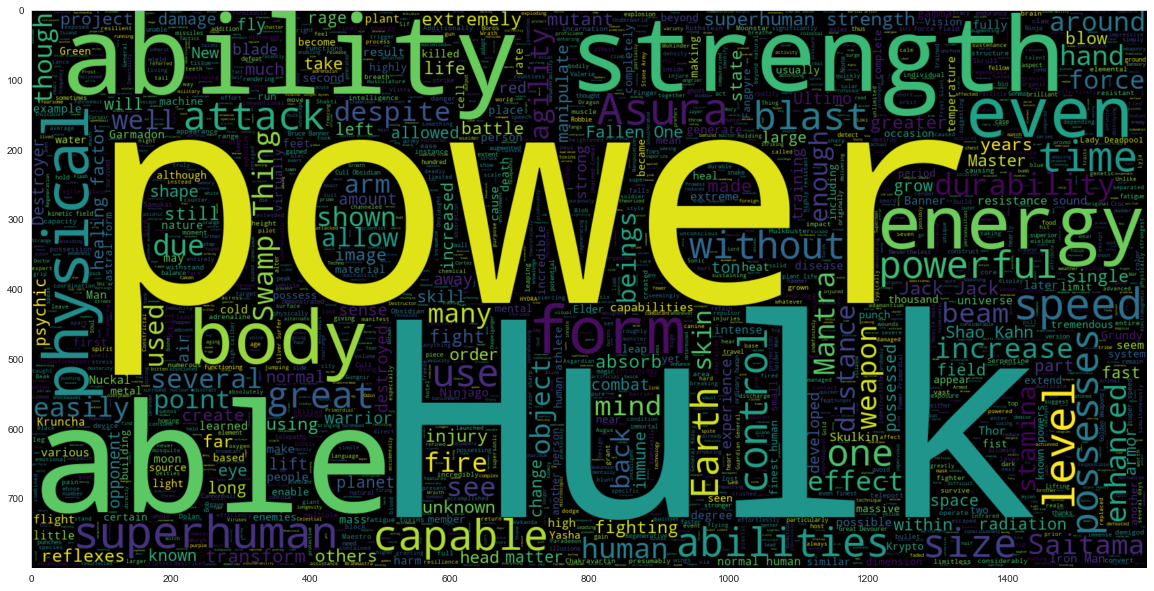

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.intelligence_score == 0].powers_text))
plt.imshow(wc , interpolation = 'bilinear')

#### Количество слов в каждом тексте

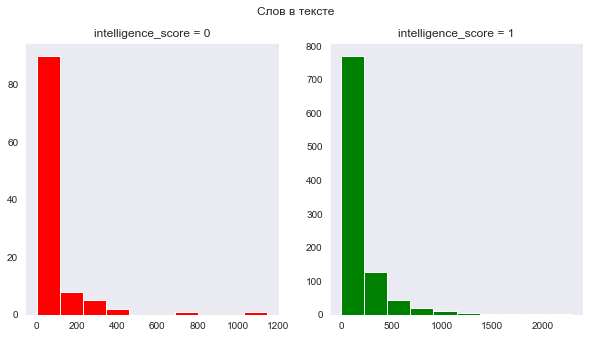

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['intelligence_score']==0]['powers_text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('intelligence_score = 0')
text_len=df[df['intelligence_score']==1]['powers_text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('intelligence_score = 1')
fig.suptitle('Слов в тексте')
plt.show()

#### Средняя длина слова в тексте в тексте

Text(0.5, 0.98, 'Средняя длина слова в каждом тексте')

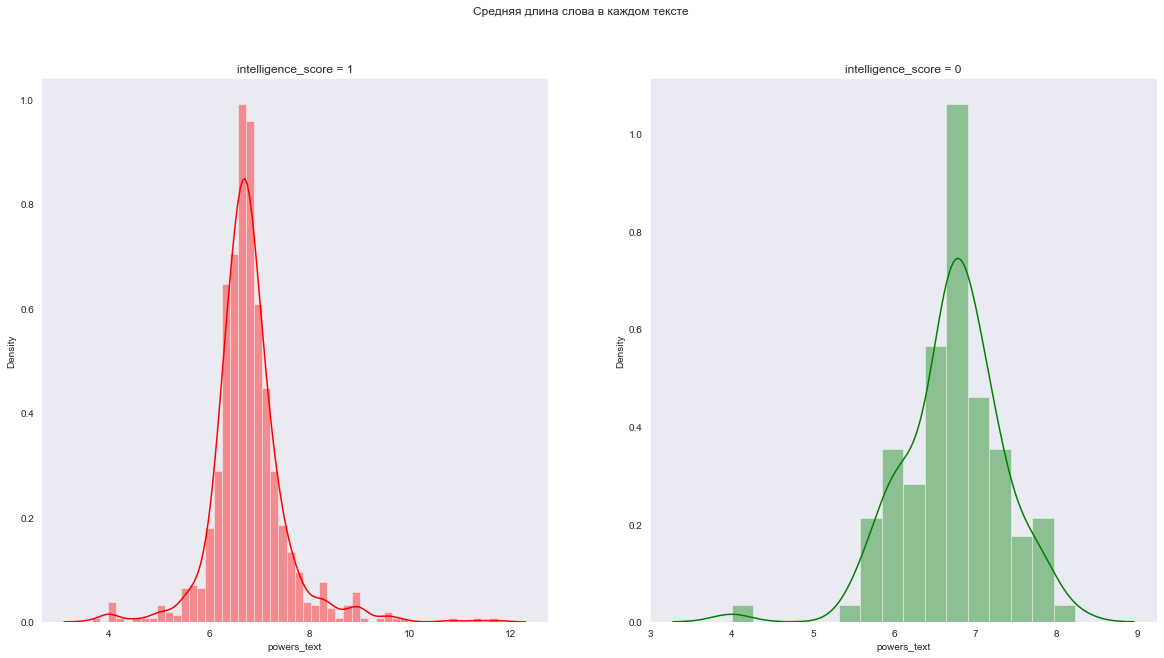

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=df[df['intelligence_score']==1]['powers_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('intelligence_score = 1')
word=df[df['intelligence_score']==0]['powers_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('intelligence_score = 0')
fig.suptitle('Средняя длина слова в каждом тексте')

### Word embedding

Word Embedding – это техника векторного представления слов в тексте. Она способна уловить контекст, семантику, синтаксическую схожесть, связь с другими словами. <br>

Сначала разделим данные на тест и трейн, а потом применим векторизацию с помощью sklearn:

In [ ]:
text = df.powers_text.values
y = df.intelligence_score.values

text_train, text_test, y_train, y_test = train_test_split(text, 
                                                                    y, test_size=0.25, random_state=1000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test  = vectorizer.transform(text_test)

### Классификаторы машинного обучения

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = ['LogisticRegression()', 'SGDClassifier()', 
               'RandomForestClassifier()', 'DecisionTreeClassifier()', 'KNeighborsClassifier()']

for i in classifiers:
    classifier = eval(i)
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)

    print("Accuracy of {}:".format(i), score)

Accuracy of LogisticRegression(): 0.8713235294117647
Accuracy of SGDClassifier(): 0.8897058823529411
Accuracy of RandomForestClassifier(): 0.9227941176470589
Accuracy of DecisionTreeClassifier(): 0.8566176470588235
Accuracy of KNeighborsClassifier(): 0.8860294117647058


Но сильно доверять этим результатам не стоит, так как в данных сильный дисбаланс. В этом можно убедиться, построив матрицу ошибок.

<AxesSubplot:>

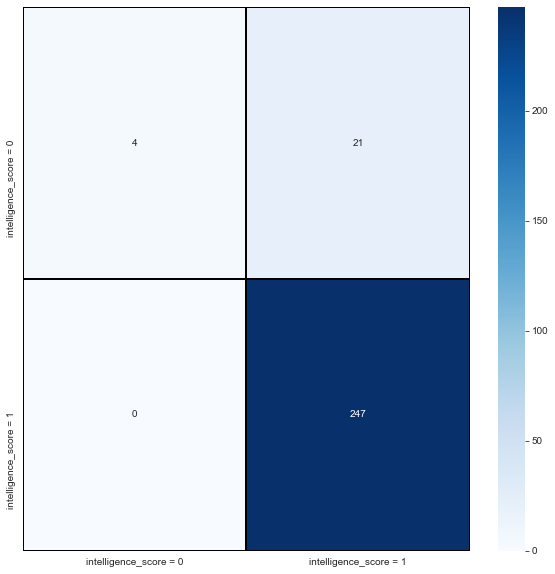

In [ ]:
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
cm = confusion_matrix(y_test,pred)

cm = pd.DataFrame(cm , index = ['intelligence_score = 0','intelligence_score = 1'] , columns = ['intelligence_score = 0','intelligence_score = 1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , 
            xticklabels = ['intelligence_score = 0','intelligence_score = 1'] , yticklabels = ['intelligence_score = 0','intelligence_score = 1'])

Видно, что 21 значение из 25 для класса 0 предсказано неверно. Это очень плохой результат. Плохие данные дают о себе знать. Использовать нейронную сеть пока что нет смысла.

**Другими словами, мы будем брать на факультет всех подряд, что довольно плачевно.**

Как сэмплировать текстовую информацию и насколько это эффективно, если мы, например, просто будем сэмплировать вектора, не знаю. В интернете я не нашел практического применения для этой задачи.

Но можно отойти в сторону и попробовать такую задачу, как **генерация текста**.

# Генерация текста

**Идея такая:** брать начало описания, и учить сеть продолжить. Так, я смогу сам придумать начало для какого либо героя (у которого описания нет) и посмотреть, какое описание сеть ему придумает.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# path1 = '/content/drive/My Drive/data/abiturient.csv'

# df = pd.read_csv(path1)
# df.head()

In [3]:
df = pd.read_csv('/Users/magatigr/Downloads/abiturient.csv')
df = df.powers_text.to_frame()
df.dropna(axis = 0, inplace = True)

In [4]:
df.head()

,powers_text
2,"On rare occasions, and through unusual circu..."
6,Abe is a humanoid amphibious creature. He has...
7,Abin Sur possessed an exceptionally strong s...
8,'Blonsky''s transformation into the Abominatio...
9,Abra Kadabra was augmented with various nanot...


## Предобработка

Воспользуемся методом Tokenizer из Keras, которая сразу удалит пункуацию, переведет в нижний регистр, поставит каждому слову уникальное число. **Стоп-слова** оставим и будем учиться в том числе и на них, так как для более натурального текста они нужны.

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 50000 # Максимальный размер словаря
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.powers_text.values)
sequences = tokenizer.texts_to_sequences(df.powers_text.values)
print(sequences[:5])

[[27, 1547, 657, 4, 50, 3707, 2715, 1993, 16, 60, 20, 2, 1607, 38, 5, 5178, 434, 1001, 34, 1096, 147, 10, 1, 2181, 45, 1, 2181, 45, 9, 1002, 2, 31, 4047, 8, 57, 2314, 1993, 16, 89, 28, 37, 2, 520, 452, 8, 1, 570, 18, 2426, 6056, 19, 6, 84, 3143, 2, 163, 26, 30, 6056, 19, 250, 185, 3, 1003, 7, 16, 499, 20, 2, 1994, 1134, 3, 2562, 4, 2909, 1248, 7315, 11, 5, 842, 221, 1723, 1817, 1, 1429, 955, 1173, 57, 3, 6, 84, 44, 675, 327, 63, 58, 975, 163, 3708, 474, 4, 1135, 1, 210, 303, 3, 1, 2181, 45, 117, 1608, 322, 2427, 82, 1993, 16, 60, 20, 2, 1097, 22, 23, 82, 323, 185, 9, 153, 58, 40, 1249, 2, 5, 273, 605, 18, 606, 318, 1136, 29, 64, 97, 1, 85, 1993, 13, 2315, 18, 1, 318, 10, 5, 337, 1993, 12, 430, 38, 5, 56, 65, 14, 3709, 1, 2087, 1993, 16, 208, 1, 32, 2, 430, 23, 98, 4, 33, 801, 91, 1430, 24, 1174, 1487, 266, 823, 3144, 8, 658, 4, 490, 9732, 1341, 3, 676, 1004, 4, 5179, 571, 2, 6, 2316, 4521, 234, 761, 27, 5, 6057, 1995, 3, 435, 6, 357, 447, 1005, 4, 6, 1098, 6058, 51, 1250, 38, 5, 929, 4

После предыдущего шага у нас получился лист листов. Сделаем лист одноразмерным, чтобы потом можно было применять метод скользящего окна, чтобы предсказать следующее слово.

In [6]:
text = [item for sublist in sequences for item in sublist]
vocab_size = len(tokenizer.word_index)

In [7]:
vocab_size

16423

In [8]:
# Тренируемся на 19 словах, чтобы предсказать 20
sentence_len = 20
pred_len = 1
train_len = sentence_len - pred_len
seq = []
# Скользящее окно для генерации трейна
for i in range(len(text)-sentence_len):
    seq.append(text[i:i+sentence_len])
# Декодинг обратно в слова через reversed
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

Каждая строка в последовательности – это 20 слов. Мы вставляем первые 19 слов как input, чтобы предсказать 20-ое:

In [9]:
trainX = []
trainy = []
for i in seq:
    trainX.append(i[:train_len])
    trainy.append(i[-1])

## Модель

Для предсказания будет использовать сеть LSTM. Обучение будет проходить в отдельном ноутбуке. Здесь же просто обозначены модели и загружены веса для третьей модели (самой результативной по оценке на 10 эпохах)

### Модель 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

model1 = Sequential([
    Embedding(vocab_size+1, 50, input_length=train_len),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(100, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

model1.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(np.asarray(trainX), pd.get_dummies(np.asarray(trainy)), batch_size=128, epochs=100)

### Модель 2

Добавим к модели Dropout, чтобы предотвратить переобучение:

In [ ]:
model2 = Sequential([
    Embedding(vocab_size+1, 50, input_length=train_len),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(100, activation='relu'),
    Dropout(0.1),
    Dense(vocab_size, activation='softmax')
])

model2.summary()

# Early stopping тормозит обучение, когда скор не увеличивается
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history = model2.fit(np.asarray(trainX),
          pd.get_dummies(np.asarray(trainy)),
          epochs = 100,
          batch_size = 128,
          verbose = 1)

### Модель 3

Увеличим количество нейронов в слоях:

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

model3 = Sequential([
    Embedding(vocab_size+1, 50, input_length=train_len),
    LSTM(150, return_sequences=True),
    LSTM(150),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(vocab_size, activation='softmax')
])

# model3.summary()

# # Early stopping тормозит обучение, когда скор не увеличивается
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
# model3.compile(optimizer='adam',
#                loss='categorical_crossentropy',
#                metrics=['accuracy'])

# history = model3.fit(np.asarray(trainX),
#           pd.get_dummies(np.asarray(trainy)),
#           epochs = 10,
#           batch_size = 128,
#           verbose = 1)

In [11]:
model3.load_weights('/Users/magatigr/Downloads/model3_weights.h5')

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def gen(model,seq,max_len = 20):
    # Токенизируем вход
    tokenized_sent = tokenizer.texts_to_sequences([seq])
    max_len = max_len+len(tokenized_sent[0])
    # Если наш текст не соответствует длине в 19 слов, то используем 'pad sequence'
    # Таким образом предложение преобразуется в нужный для LSTM формат
    #`pad_sequences` добавляет нули слева от нашего распределение пока он не станет длиной в 19, то есть кол0во фичей
    while len(tokenized_sent[0]) < max_len:
        padded_sentence = pad_sequences(tokenized_sent[-19:],maxlen=19)
        op = model.predict(np.asarray(padded_sentence).reshape(1,-1))
        tokenized_sent[0].append(op.argmax()+1)
        
    return " ".join(map(lambda x : reverse_word_map[x],tokenized_sent[0]))

In [35]:
def test_models(test_string, model, sequence_length= 50):
    #Генерируем выход длиной в 50 исходя из входа 
    print('Input String: ', test_string)
    print(gen(model,test_string,sequence_length))

Нужно написать предложение на 19 слов, и модель смоделирует описание для студента:

In [36]:
sent = 'Magomed was born with the super ability to fly. Moreover, his body can become as hard as stone.'

In [37]:
test_models(sent, model3)

Input String:  Magomed was born with the super ability to fly. Moreover, his body can become as hard as stone.
was born with the super ability to fly moreover his body can become as hard as stone or even even by passing it into the rigors of intangible he can also use his electrical powers to enhance his own powers with his mouth causing him to draw objects with his body and even cause them to continue to prolonging his hand to another place he can also


Получилось забавно)

# С признаком наличие/отсутствие текстовой информации

Используем текст как признак, но только в качестве его наличия или отсутствия.

#### Быстро проделаем все шаги предобработки одним безымянным куском кода

In [ ]:
df = pd.read_csv('/Users/magatigr/Downloads/abiturient.csv')
df.drop('name', axis = 1, inplace = True )

df.dropna(subset = ['intelligence_score'], axis = 0, inplace = True)
intelligence_score = df['intelligence_score'].to_numpy().reshape(-1,1)
binarizer = Binarizer(0.8*df['intelligence_score'].mean())
new_values = binarizer.fit_transform(intelligence_score)
df['intelligence_score'] = new_values
df['intelligence_score']

df.dropna(axis = 0, subset=superpowers_cols, inplace = True)

df.hair_color.fillna('Black', inplace = True)
df.eye_color.fillna('Blue', inplace = True)

df.fillna('nan', inplace = True)
df.drop(df.loc[(df.gender == 'nan') & (df.real_name == 'nan')].index, inplace = True)
df.loc[df.gender == 'nan']
df_g_pred = df.loc[df.gender == 'nan']
df_g_pred = df_g_pred[['real_name', 'gender' ]]
df_g_true = df.loc[df.gender != 'nan']
df_g_true = df_g_true[['real_name', 'gender' ]]

from nameparser import HumanName

names = []
for value in df_g_pred['real_name']:
    name = HumanName(value)
    names.append(name.first)
    
df_g_pred['Name'] = names

import gender_guesser.detector as gender

gd = gender.Detector()
gender = []
for value in df_g_pred['Name']:
    g = gd.get_gender(value)
    gender.append(g)
    
df_g_pred['gender'] = gender

df_g_pred.loc[df_g_pred.gender == 'male', 'gender'] = 'Male'
df_g_pred.loc[df_g_pred.gender == 'female', 'gender'] = 'Female'
df_g_pred.loc[df_g_pred.gender == 'unknown', 'gender'] = 'Male'
df_g_pred.loc[df_g_pred.gender == 'mostly_female', 'gender'] = 'Female'
df_g_pred.loc[df_g_pred.gender == 'andy', 'gender'] = 'Female'

df_gender = pd.concat([df_g_pred, df_g_true], axis = 0,  join = 'inner', ignore_index = False)
df_gender.sort_index(ascending=True, inplace = True)

df.gender = df_gender.gender.copy()

weights = []
for value in df.weight:
    if len(value.split())>2:
        elements = value.split()
        weights.append(elements[3])
        
#исправим пару значение
weights[784] = 271.4
weights[878] = 208

heights = []
for value in df.height:
    if len(value.split())>2:
        elements = value.split()
        heights.append(elements[2])
        
weights = list(map(float, weights))
heights = list(map(float, heights))

all_weights = []
for value in df.weight:
    if len(value.split())>2:
        elements = value.split()
        all_weights.append(elements[3])
    else:
        all_weights.append(int(statistics.median(weights)))
        
all_weights[1093] = 271.4
all_weights[1215] = 208.0
        
all_heights = []
for value in df.height:
    if len(value.split())>2:
        elements = value.split()
        all_heights.append(elements[2])
    else:
        all_heights.append(int(statistics.median(heights)))
        
all_weights = list(map(float, all_weights))
all_heights = list(map(float, all_heights))

df.weight = all_weights
df.height = all_heights

Q1_w = df.weight.quantile(0.1)
Q3_w = df.weight.quantile(0.9)

Q1_h = df.height.quantile(0.1)
Q3_h = df.height.quantile(0.9)

df = df.loc[(df.weight>Q1_w) & (df.weight<Q3_w)]
df = df.loc[(df.height>Q1_h) & (df.height<Q3_h)]

df.drop('real_name', axis = 1, inplace = True)

df.loc[(df.eye_color == 'Blue')|(df.eye_color == 'Brown'), 'eye_color'] = 'not rare'
df.loc[(df.eye_color != 'Blue')&(df.eye_color != 'Brown')&(df.eye_color != 'not rare'), 'eye_color'] = 'rare'

df.loc[(df.hair_color == 'Black')|(df.hair_color == 'Brown'), 'hair_color'] = 'not rare'
df.loc[(df.hair_color != 'Black')&(df.hair_color != 'Brown')&(df.hair_color != 'not rare'), 'hair_color'] = 'rare'

Теперь обработает колонку с текстом:

In [ ]:
df.loc[df.powers_text != 'nan', 'powers_text' ] = 1
df.loc[df.powers_text == 'nan', 'powers_text' ] = 0

Категоризуем:

In [ ]:
df = pd.get_dummies(df, drop_first = True)

Разберемся с дисбалансом:

In [ ]:
from imblearn.over_sampling import ADASYN

sm = ADASYN(random_state = 42)
X = df.drop('intelligence_score', axis = 1)
y = df['intelligence_score']
X_new, y_new = sm.fit_sample(X, y)

df = pd.concat([X_new, y_new], axis = 1)

## Строим модель и предсказываем:

Оптимальное число фичей : 51
Лучшие фичи : Index(['height', 'weight', 'has_electrokinesis', 'has_mind_control_resistance',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_element_control', 'has_size_changing', 'has_fire_resistance',
       'has_fire_control', 'has_dexterity', 'has_illusions',
       'has_energy_beams', 'has_peak_human_condition', 'has_shapeshifting',
       'has_heat_resistance', 'has_jump', 'has_energy_absorption',
       'has_cold_resistance', 'has_magic', 'has_telekinesis',
       'has_toxin_and_disease_resistance', 'has_telepathy', 'has_regeneration',
       'has_immortality', 'has_teleportation', 'has_force_fields',
       'has_energy_manipulation', 'has_endurance', 'has_longevity',
       'has_weapon-based_powers', 'has_energy_blasts', 'has_enhanced_senses',
       'has_invulnerability', 'has_stealth', 'has_marksmanship', 'has_flight',
       'has_accelerated_healing', 'has_weapons_master', 'has_intelligence',
       'ha

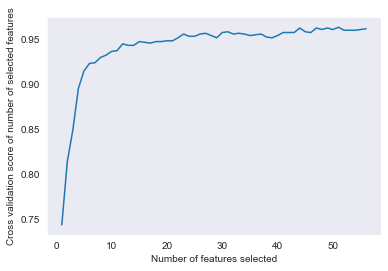

,mean_absolute_error
model 4,0.0372881
model 5,0.0440678
model 8,0.0610169
model 9,0.0627119
model 3,0.0813559
model 2,0.0983051
model 1,0.111864
model 6,0.113559
model 7,0.115254


In [ ]:
#обозначим трейн и тест
X = df.drop('intelligence_score', axis = 1)
y = df.intelligence_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Шкалируем
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['weight', 'height']])
X_test_scaled = scaler.transform(X_test[['weight', 'height']])
X_train[['weight', 'height']] = X_train_scaled
X_test[['weight', 'height']] = X_test_scaled

#Отбор признаков
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Оптимальное число фичей :', rfecv.n_features_)
print('Лучшие фичи :', X_train.columns[rfecv.support_])

best_features = X_train.columns[rfecv.support_]

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#вводим новые данные
X_train = X_train[best_features]
X_test = X_test[best_features]

# логистическая регрессия
model1 = LogisticRegression()

# градиентный бустинг
model2 = LGBMClassifier(max_depth=4, n_estimators=300, learning_rate=0.005, random_state=1, num_leaves = 20)
model3 = LGBMClassifier(max_depth=6, n_estimators=300, learning_rate=0.005, random_state=1, num_leaves = 20)

# случайный лес
model4 = RandomForestClassifier(n_estimators=10, random_state=1)
model5 = RandomForestClassifier(n_estimators=15, random_state=1)

# обычный бэггинг логистических регрессий
model6 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=1)
model7 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=15, random_state=1)

# обычный бэггинг деревьев
model8 = BaggingClassifier(n_estimators=10, random_state=1)
model9 = BaggingClassifier(n_estimators=15, random_state=1)

models = [model1, model2, model3, model4, model5,
         model6, model7, model8, model9]

table_models = pd.DataFrame(columns = ["mean_absolute_error"], index = ["model "+str(i) for i in range(1,10)])

#Обучаем
for num, mod in enumerate(models):
    mod.fit(X_train, y_train)
    mae_valid = mean_absolute_error(y_test, mod.predict(X_test))
    table_models.loc["model "+str(num+1), "mean_absolute_error"] = mae_valid

#Проверяем результат
table_models.sort_values(by="mean_absolute_error")

Точность поднялась на одну сотую. Но снова модель RFECV отобрала, как кажется, слишком много признаков.

#### Нейронная сеть

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=10, epochs=100, verbose = 1)

mean_absolute_error(y_test, model.predict(X_test))

Epoch 1/100
120/120 [==============================] - 0s 960us/step - loss: 0.5906 - accuracy: 0.6695
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8318
Epoch 3/100
120/120 [==============================] - 0s 896us/step - loss: 0.2965 - accuracy: 0.8996
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 0.2335 - accuracy: 0.9155
Epoch 5/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9280
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1661 - accuracy: 0.9414
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 0.1421 - accuracy: 0.9506
Epoch 8/100
120/120 [==============================] - 0s 959us/step - loss: 0.1228 - accuracy: 0.9632
Epoch 9/100
120/120 [==============================] - 0s 934us/step - loss: 0.1082 - accuracy: 0.9724
Epoch 10/100
120/120 [==============================] - 0s 957us/step - loss: 0.095

0.05285440806689078

Точность нейронки тоже выросла на одну сотую. Узнаем, **какой вклад носит наличие текста в прогноз**.

Снова проверим значимость переменных:

In [ ]:
importances = list(zip(model4.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.1134806236048462, 'has_intelligence'),
 (0.10509876234046453, 'has_durability'),
 (0.09660381722497571, 'has_agility'),
 (0.07302271114585941, 'has_stamina'),
 (0.05464269147120181, 'has_accelerated_healing'),
 (0.050559201705424515, 'has_weapons_master'),
 (0.043050124914377375, 'has_marksmanship'),
 (0.0381813891056442, 'height'),
 (0.03486788251135979, 'has_reflexes'),
 (0.03353566523979752, 'weight'),
 (0.027691805287769804, 'has_weapon-based_powers'),
 (0.022291624368223316, 'has_invulnerability'),
 (0.022268303683945462, 'hair_color_rare'),
 (0.017417096285222596, 'has_super_speed'),
 (0.01682543069413673, 'has_telepathy'),
 (0.0162091336364478, 'has_flight'),
 (0.01617108374321415, 'has_energy_absorption'),
 (0.01595121298671243, 'has_teleportation'),
 (0.01422939597242078, 'has_energy_blasts'),
 (0.013319972621866849, 'powers_text_1'),
 (0.011694032679978945, 'has_super_strength'),
 (0.011254023486493047, 'has_energy_beams'),
 (0.01098249071687311, 'has_telepathy_resistance

Где-то чуть выше середины)

# Конец!